In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import scipy.signal as signal

### Carregando os dados em um dataframe

In [5]:
url = 'https://tidesandcurrents.noaa.gov/sltrends/data/874-051_meantrend.txt'

cols = ['year', 'month', 'sealevel', 'linear_trend', 'high_conf', 'low_conf']

df = pd.read_csv(url, header=6, delim_whitespace=True, names=cols, usecols=['year', 'month', 'sealevel'])

## ler da url, nomes das colunas na linha 6, determina um espaço como o separador de colunas, 
## nomes das colunas/"keys", usecols separa os dados de interesse

In [6]:
df

,year,month,sealevel
0,1954,5,6.871
1,1954,6,6.809
2,1954,7,6.800
3,1954,8,6.776
4,1954,9,6.834
...,...,...,...
608,2006,8,7.182
609,2006,9,7.157
610,2006,10,7.071
611,2006,11,7.121


### Criar um array de datas e indexar o dataframe

In [7]:
# cria um array de datas no formato datetime64, precisa de argumentos de ano, mês e dia
# k determina o tamanho do array
time = [np.datetime64(datetime.datetime(year=df['year'][k], month=df['month'][k], day=15))
    for k in range(len(df['year']))]

#transforma em um array numpy
time = np.array(time)

# transforma em pandas datetime
df['time'] = pd.to_datetime(time)

# indexa o dataframe
df = df.set_index('time')

In [8]:
df

,year,month,sealevel
time,,,
1954-05-15,1954,5,6.871
1954-06-15,1954,6,6.809
1954-07-15,1954,7,6.800
1954-08-15,1954,8,6.776
1954-09-15,1954,9,6.834
...,...,...,...
2006-08-15,2006,8,7.182
2006-09-15,2006,9,7.157
2006-10-15,2006,10,7.071


### Visualizar os dados (Passos 3 e 4)

In [9]:
df.keys()

Index(['year', 'month', 'sealevel'], dtype='object')

Text(0.5, 0, 'Time')

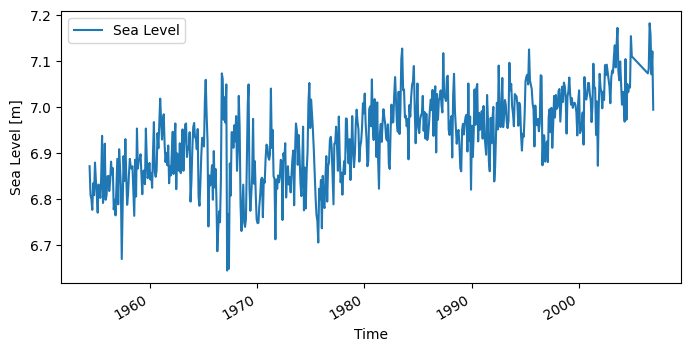

In [10]:
# plotar a figura
fig = plt.figure(figsize = (8,4))
ax1 = fig.add_subplot(111)

# plotar o nível do mar com a plotagem do pandas
df.plot(y='sealevel', ax=ax1, label='Sea Level')

# adicionar labels e legendas
plt.legend()
ax1.set_ylabel('Sea Level [m]')
ax1.set_xlabel('Time')

# salvar a figura
#plt.savefig('p3_sealevel')

#### Anotações:

É perceptível uma tendência de aumento do nível do mar em Cananéia ao longo das décadas separadas da oscilação do nível do mar em menor escala de tempo.

A amplitude da variabilidade é de 0,2 metros em 52 anos.

Estimando:

0,2 metros/ 52 anos = 200 mm/ 52 anos = 3.8461538461538463 mm/ano.

In [11]:
200/52

3.8461538461538463

### Ajustar tendência linear mensal (Passo 4)

In [12]:
# cria um array de elapsed time em ano inteiro e meses e dias em decimais
# subtrai o tempo pelo tempo inicial, transforma em float e converte de microssegundos para anos
time_years = (time - time[0]).astype(float)/1.e6/86400/365

# cria um array de tempo em ano inteiro e meses e dias em decimais (ex. 1988,38428) a partir do tempo de referência 1970
time_years_full = time.astype(float)/1.e6/86400/365 + 1970

In [13]:
time_years

array([ 0.        ,  0.08493151,  0.16712329,  0.25205479,  0.3369863 ,
        0.41917808,  0.50410959,  0.58630137,  0.67123288,  0.75616438,
        0.83287671,  0.91780822,  1.        ,  1.08493151,  1.16712329,
        1.25205479,  1.3369863 ,  1.41917808,  1.50410959,  1.58630137,
        1.67123288,  1.75616438,  1.83561644,  1.92054795,  2.00273973,
        2.08767123,  2.16986301,  2.25479452,  2.33972603,  2.42191781,
        2.50684932,  2.5890411 ,  2.6739726 ,  2.75890411,  2.83561644,
        2.92054795,  3.00273973,  3.08767123,  3.16986301,  3.25479452,
        3.33972603,  3.42191781,  3.50684932,  3.5890411 ,  3.6739726 ,
        3.75890411,  3.83561644,  3.92054795,  4.00273973,  4.08767123,
        4.16986301,  4.25479452,  4.33972603,  4.42191781,  4.50684932,
        4.5890411 ,  4.6739726 ,  4.75890411,  4.83561644,  4.92054795,
        5.00273973,  5.08767123,  5.16986301,  5.25479452,  5.33972603,
        5.42191781,  5.50684932,  5.5890411 ,  5.6739726 ,  5.75

In [15]:
# função ajusta polinômios de acordo com o grau desejado e retorna uma matriz com os índices do polinômio
func = np.polyfit(time_years, df['sealevel'], 1)
trend = (time_years*func[0])+func[-1]
df['trend'] = trend

In [16]:
func

array([4.17092743e-03, 6.82636121e+00])

In [17]:
df

,year,month,sealevel,trend
time,,,,
1954-05-15,1954,5,6.871,6.826361
1954-06-15,1954,6,6.809,6.826715
1954-07-15,1954,7,6.800,6.827058
1954-08-15,1954,8,6.776,6.827413
1954-09-15,1954,9,6.834,6.827767
...,...,...,...,...
2006-08-15,2006,8,7.182,7.044449
2006-09-15,2006,9,7.157,7.044804
2006-10-15,2006,10,7.071,7.045146


Text(0.5, 0, 'Time')

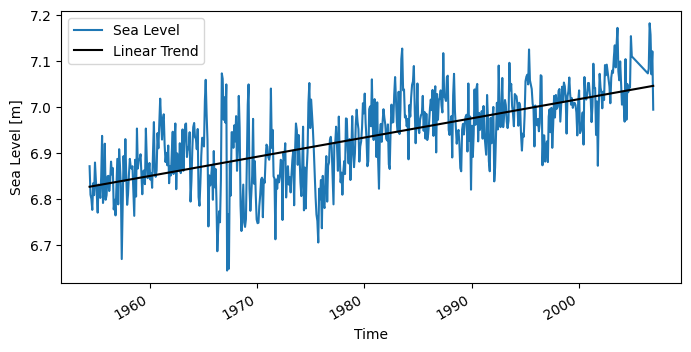

In [22]:
# plotar a figura
fig = plt.figure(figsize = (8,4))
ax1 = fig.add_subplot(111)

# plotar o sealevel e a tendência
df.plot(y='sealevel', ax=ax1, label='Sea Level')
df.plot(y='trend', ax=ax1, label='Linear Trend', c='black')

# adicionar legendas e labels
plt.legend()
ax1.set_ylabel('Sea Level [m]')
ax1.set_xlabel('Time')

# salvar imagem
#plt.savefig('p3_lineartrend')

### Média anual (Passo 5)

In [20]:
# separa os valores por ano e faz a média dos sealevels, retorna uma pandas series
group = df.groupby('year')['sealevel'].mean()
group

year
1954    6.827250
1955    6.829083
1956    6.833833
1957    6.830083
1958    6.859917
1959    6.868583
1960    6.899417
1961    6.908083
1962    6.891333
1963    6.904333
1964    6.902167
1965    6.895000
1966    6.866667
1967    6.870333
1968    6.841417
1969    6.870500
1970    6.827500
1971    6.874500
1972    6.855250
1973    6.884167
1974    6.889000
1975    6.850167
1976    6.850917
1977    6.882083
1978    6.907000
1979    6.942583
1980    6.966250
1981    6.945000
1982    6.962833
1983    7.008333
1984    7.000167
1985    6.965250
1986    6.993083
1987    7.020167
1988    6.956167
1989    6.943417
1990    6.974667
1991    6.941750
1992    6.971833
1993    7.001583
1994    6.979417
1995    7.034727
1996    6.957417
1997    6.968083
1998    7.015583
1999    7.008833
2000    7.002500
2001    7.007000
2002    7.043909
2003    7.094917
2004    7.043417
2006    7.097286
Name: sealevel, dtype: float64

In [21]:
# cria a tendência das médias anuais
func2 = np.polyfit(group.index, group, 1)
trend2 = (time_years_full*func2[0]) + func2[-1]
df['trend2'] = trend2

Text(0.5, 0, 'Time')

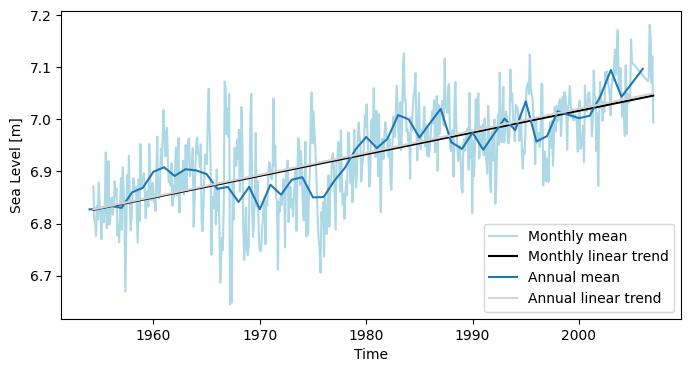

In [23]:
# plotar a figura
fig = plt.figure(figsize = (8,4))
ax1 = fig.add_subplot(111)

# plotar as tendências, médias e sealevel
plt.plot(time_years_full, df['sealevel'], label='Monthly mean', c='lightblue')
plt.plot(time_years_full, df['trend'], label='Monthly linear trend', c='black')
plt.plot(group.index, group, label='Annual mean')
plt.plot(time_years_full, df['trend2'], label='Annual linear trend', c='lightgrey')

# adicionar legendas e labels
plt.legend()
ax1.set_ylabel('Sea Level [m]')
ax1.set_xlabel('Time')

# salvar a figura
#plt.savefig('p3_monthly_annual')

### Anomalia do nível do mar (Passo 6)

In [24]:
# calcular a anomalia das médias anuais em relação à media total
anomaly = group - df['sealevel'].mean()

In [25]:
anomaly

year
1954   -0.105708
1955   -0.103874
1956   -0.099124
1957   -0.102874
1958   -0.073041
1959   -0.064374
1960   -0.033541
1961   -0.024874
1962   -0.041624
1963   -0.028624
1964   -0.030791
1965   -0.037958
1966   -0.066291
1967   -0.062624
1968   -0.091541
1969   -0.062458
1970   -0.105458
1971   -0.058458
1972   -0.077708
1973   -0.048791
1974   -0.043958
1975   -0.082791
1976   -0.082041
1977   -0.050874
1978   -0.025958
1979    0.009626
1980    0.033292
1981    0.012042
1982    0.029876
1983    0.075376
1984    0.067209
1985    0.032292
1986    0.060126
1987    0.087209
1988    0.023209
1989    0.010459
1990    0.041709
1991    0.008792
1992    0.038876
1993    0.068626
1994    0.046459
1995    0.101770
1996    0.024459
1997    0.035126
1998    0.082626
1999    0.075876
2000    0.069542
2001    0.074042
2002    0.110952
2003    0.161959
2004    0.110459
2006    0.164328
Name: sealevel, dtype: float64

In [26]:
# tirar a tendência da anomalia
anomaly_detrended = signal.detrend(anomaly)

In [23]:
anomaly_detrended

array([ 0.00130644, -0.00109529, -0.00058035, -0.00856541,  0.01703286,
        0.02146447,  0.04806274,  0.05249435,  0.03150929,  0.04027423,
        0.0338725 ,  0.02247077, -0.01009762, -0.01066602, -0.04381774,
       -0.01896947, -0.06620453, -0.02343959, -0.04692465, -0.02224304,
       -0.02164477, -0.06471317, -0.06819823, -0.04126662, -0.02058501,
        0.01076326,  0.03019487,  0.00470981,  0.01830808,  0.05957302,
        0.04717129,  0.00801956,  0.03161784,  0.05446611, -0.01376895,
       -0.03075401, -0.00373907, -0.0408908 , -0.01504253,  0.01047241,
       -0.01592931,  0.03514623, -0.04639943, -0.03996783,  0.00329711,
       -0.00768795, -0.01825634, -0.0179914 ,  0.01468263,  0.06145514,
        0.00572008,  0.05535407])

Text(0, 0.5, 'Sea Level Anomaly [m]')

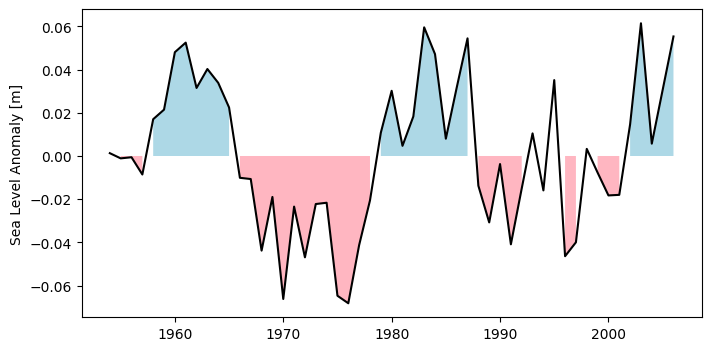

In [27]:
# plotar a figura
plt.figure(figsize=(8,4))

# plotar a anomalia sem tendência por ano
plt.plot(group.index, anomaly_detrended, c='black')

# colorir condicionalmente entre duas curvas y, determinar a cor para cada relação entre elas
plt.fill_between(group.index, anomaly_detrended, 0, where = (anomaly_detrended>0), facecolor = 'lightblue')
plt.fill_between(group.index, anomaly_detrended, 0, where = (anomaly_detrended<0), facecolor = 'lightpink')

# adicionar labels
plt.ylabel('Sea Level Anomaly [m]')

# salvar a imagem
#plt.savefig('p3_anomaly')

In [28]:
# descreve com o pandas os valores estatísticos da anomalia
anomaly.describe()

count    52.000000
mean      0.000980
std       0.072653
min      -0.105708
25%      -0.062499
50%       0.009209
75%       0.061897
max       0.164328
Name: sealevel, dtype: float64

### Correlação entre nível médio do mar anual e nível de CO2 atmosférico (Passo 7)

In [30]:
url2 = 'https://datahub.io/core/co2-ppm/r/co2-mm-mlo.csv'

In [34]:
# carregar os dados da curva de keeling cortando os últimos anos de dados (para alinhar os tamanhos dos dataframes)
keeling = pd.read_csv(url2,sep=',', nrows=586)

In [35]:
keeling

,Date,Decimal Date,Average,Interpolated,Trend,Number of Days
0,1958-03-01,1958.208,315.71,315.71,314.62,-1
1,1958-04-01,1958.292,317.45,317.45,315.29,-1
2,1958-05-01,1958.375,317.50,317.50,314.71,-1
3,1958-06-01,1958.458,-99.99,317.10,314.85,-1
4,1958-07-01,1958.542,315.86,315.86,314.98,-1
...,...,...,...,...,...,...
581,2006-08-01,2006.625,380.41,380.41,382.08,27
582,2006-09-01,2006.708,378.85,378.85,382.16,27
583,2006-10-01,2006.792,379.13,379.13,382.46,23
584,2006-11-01,2006.875,380.15,380.15,382.33,29


In [36]:
## TERMINAR (USAR FUNÇÃO INTERSECTION DO PANDAS PARA SEPARAR DIRETAMENTE AS DATAS IGUAIS ENTRE KEELING E O DATAFRAME)

#df4 = pd.read_csv(url, header=6, delim_whitespace=True, names=cols, usecols=['year', 'month', 'sealevel'])
#time2 = [np.datetime64(datetime.datetime(year=df4['year'][k], month=df4['month'][k], day=01))
 #   for k in range(len(df4['year']))]
#time2 = np.array(time2)

#df4['time'] = pd.to_datetime(time2)

#df = df.set_index('time')

#df4.intersection(keeling)

In [37]:
# copia o dataframe para não alterar os dados já plotados anteriormente
df2 = df.copy()
df2

,year,month,sealevel,trend,trend2
time,,,,,
1954-05-15,1954,5,6.871,6.826361,6.827492
1954-06-15,1954,6,6.809,6.826715,6.827851
1954-07-15,1954,7,6.800,6.827058,6.828199
1954-08-15,1954,8,6.776,6.827413,6.828558
1954-09-15,1954,9,6.834,6.827767,6.828917
...,...,...,...,...,...
2006-08-15,2006,8,7.182,7.044449,7.048681
2006-09-15,2006,9,7.157,7.044804,7.049040
2006-10-15,2006,10,7.071,7.045146,7.049388


In [38]:
# função where transforma todos os dados posteriores a 1958 em nan e o dropna os remove
df3 = df2.where(df2.year>=1958).dropna()

In [39]:
# agrupar os dados de nível do mar por ano e fazer a média anual
annual_mean = df3.groupby('year')['sealevel'].mean()
annual_mean

year
1958.0    6.859917
1959.0    6.868583
1960.0    6.899417
1961.0    6.908083
1962.0    6.891333
1963.0    6.904333
1964.0    6.902167
1965.0    6.895000
1966.0    6.866667
1967.0    6.870333
1968.0    6.841417
1969.0    6.870500
1970.0    6.827500
1971.0    6.874500
1972.0    6.855250
1973.0    6.884167
1974.0    6.889000
1975.0    6.850167
1976.0    6.850917
1977.0    6.882083
1978.0    6.907000
1979.0    6.942583
1980.0    6.966250
1981.0    6.945000
1982.0    6.962833
1983.0    7.008333
1984.0    7.000167
1985.0    6.965250
1986.0    6.993083
1987.0    7.020167
1988.0    6.956167
1989.0    6.943417
1990.0    6.974667
1991.0    6.941750
1992.0    6.971833
1993.0    7.001583
1994.0    6.979417
1995.0    7.034727
1996.0    6.957417
1997.0    6.968083
1998.0    7.015583
1999.0    7.008833
2000.0    7.002500
2001.0    7.007000
2002.0    7.043909
2003.0    7.094917
2004.0    7.043417
2006.0    7.097286
Name: sealevel, dtype: float64

In [40]:
## t0 = np.datetime64('1958-01-01')
### df2.where(df2.index>=t0)

In [41]:
# transforma a data decimal do keeling em inteiro e em inteiro, adicionando essa variável ao dataframe
keeling['k_years'] = (keeling['Decimal Date']*100//100).astype('int')

In [42]:
keeling

,Date,Decimal Date,Average,Interpolated,Trend,Number of Days,k_years
0,1958-03-01,1958.208,315.71,315.71,314.62,-1,1958
1,1958-04-01,1958.292,317.45,317.45,315.29,-1,1958
2,1958-05-01,1958.375,317.50,317.50,314.71,-1,1958
3,1958-06-01,1958.458,-99.99,317.10,314.85,-1,1958
4,1958-07-01,1958.542,315.86,315.86,314.98,-1,1958
...,...,...,...,...,...,...,...
581,2006-08-01,2006.625,380.41,380.41,382.08,27,2006
582,2006-09-01,2006.708,378.85,378.85,382.16,27,2006
583,2006-10-01,2006.792,379.13,379.13,382.46,23,2006
584,2006-11-01,2006.875,380.15,380.15,382.33,29,2006


In [43]:
# agrupa o dataframe de acordo com a nova variável e faz a média anual a partir dos dados de gás carbônico atmosférico
k2 = keeling.groupby('k_years')['Average'].mean()
# remove o ano escolhido da série obtida com o groupby, já que os dados do nível do mar têm esse gap
k3 = k2.drop(2005)
k3

k_years
1958    232.267000
1959    315.974167
1960    316.907500
1961    317.637500
1962    318.450833
1963    318.994167
1964    214.405833
1965    320.044167
1966    321.383333
1967    322.157500
1968    323.045000
1969    324.624167
1970    325.680000
1971    326.320000
1972    327.453333
1973    329.676667
1974    330.185000
1975    295.234167
1976    332.040000
1977    333.831667
1978    335.403333
1979    336.841667
1980    338.751667
1981    340.105000
1982    341.447500
1983    343.054167
1984    307.414167
1985    346.115833
1986    347.420833
1987    349.194167
1988    351.567500
1989    353.120833
1990    354.394167
1991    355.607500
1992    356.445833
1993    357.100000
1994    358.832500
1995    360.820000
1996    362.606667
1997    363.729167
1998    366.699167
1999    368.377500
2000    369.548333
2001    371.142500
2002    373.279167
2003    375.801667
2004    377.522500
2006    381.895833
Name: Average, dtype: float64

In [44]:
# faz a correlação entre os dois dados e retorna uma matriz de correlação
np.corrcoef(annual_mean, k3)

array([[1.        , 0.66273503],
       [0.66273503, 1.        ]])

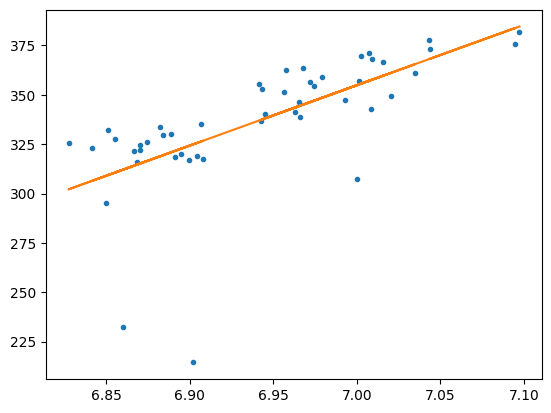

In [53]:
# plota os dados de média anual do nível do mar e keeling
plt.plot(annual_mean, k3, '.')

# ajusta o polinômio de grau 1 da tendência
func3 = np.polyfit(annual_mean, k3, 1)

# calcula a tendência a partir dos valores da média anual do nível do mar
trend3 = (annual_mean*func3[0]) + func3[-1]

# plota a tendência em função da média anual do nível do mar
plt.plot(annual_mean, trend3)